Connect to [RACE](http://www.gitan.ulg.ac.be/cms/index.php?page=donnees-de-stareso#1.) database (*Rapid Assessment of the marine Coastal Environment*) and perform a simple data query.    
Follow the instructions found at http://www.gitan.ulg.ac.be/cms/index.php?page=requetes#R.

# Prerequisites

1. You need to have a user name and password to access the database.
2. If you're not using the ULg network (wired or wireless), it is necessary to use the ULg Virtual Private Network (VPN), otherwise the connection won't be authorised.
3. Some packages have to be installed:

  * [PostgreSQL](https://cran.r-project.org/web/packages/RPostgreSQL/index.html) by issung the command `install.packages("RPostgreSQL")`
  * [getPass](https://cran.r-project.org/web/packages/getPass/index.html): `install.packages("getPass")`
  * [openair](https://cran.r-project.org/web/packages/openair/index.html): `install.packages("openair")`

## Load packages

In [1]:
library(RPostgreSQL)
library(getPass)
library(openair)

Loading required package: DBI


Load the PostgreSQL driver

In [14]:
drv <- dbDriver("PostgreSQL")

## Connection setup

You need to have an access to the database.    
Here you will have to write your credentials, but another solution would be to read them from a local file on your machine.

In [3]:
dbhost = getPass::getPass("Enter host: ")

Enter host: ········


In [7]:
dbpa = getPass::getPass("Enter word: ")

Enter word: ········


In [5]:
dbuser = getPass::getPass("Enter username: ")

Enter username: ········


In [9]:
# Open a connection
con <- dbConnect(drv, user= dbuser, password=dbpa, dbname="race_db_v2", host=dbhost, port="5432")
Sys.setenv(TZ = "UTC")

If you get an `Error in postgresqlNewConnection(drv, ...)`, check if VPN is properly established.

In [10]:
con

<PostgreSQLConnection>

In [11]:
windQuery <- "select daytime as date, speed as ws, direction as wd from (select daytime, tssta_codesta,  max(speed) as speed, max(direction) as direction from (SELECT data.daytime, timeseries.tssta_codesta, data.datavalue as speed, NULL as direction FROM public.data, public.timeseries WHERE timeseries.codeds = data.dasa_codeds AND  timeseries.tssta_codesta = 'INSJD' AND data.dataparam_codeparam = 'windspeed' UNION SELECT data.daytime, timeseries.tssta_codesta, NULL as speed, data.datavalue as direction FROM public.data, public.timeseries WHERE timeseries.codeds = data.dasa_codeds AND timeseries.tssta_codesta = 'INSJD' AND data.dataparam_codeparam = 'winddir') tabletempo GROUP BY daytime, tssta_codesta ORDER BY daytime) tabletempo2 where daytime BETWEEN '2014-02-01 00:00:00' AND  '2014-03-01 00:00:00'"

# Execute request

In [12]:
datarose <- dbGetQuery(con, windQuery)

## Generate plot

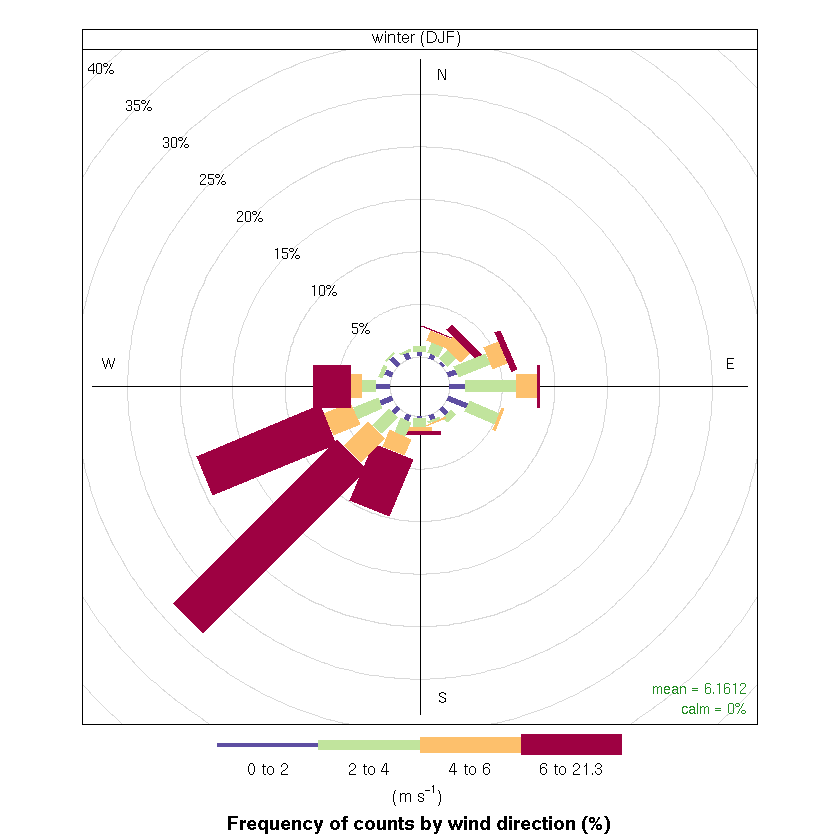

In [13]:
windRose(datarose, type="season", angle=22.5) 